In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

from gpt2_compute_reducibility import mutual_information, rotate, get_separability

In [5]:
def setup_notebook():
    try:
        from IPython import get_ipython

        ipython = get_ipython()
        ipython.magic("load_ext autoreload")
        ipython.magic("autoreload 2")

    except:
        pass

setup_notebook()

/tmp/ipykernel_3994201/4212995773.py:6: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("load_ext autoreload")
/tmp/ipykernel_3994201/4212995773.py:7: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("autoreload 2")


In [7]:
# generate some independent data
xy = np.random.randn(100000, 2)
get_separability(xy, bins_per_dim=10, angles=np.linspace(0, np.pi, 40))

(0.0002865701318180702,
 array([0.00031504, 0.00031669, 0.00035198, 0.00031535, 0.00028657,
        0.00035214, 0.00033846, 0.00038822, 0.00032632, 0.00030616,
        0.00033797, 0.00044178, 0.00036401, 0.00040114, 0.00030897,
        0.00036414, 0.00029568, 0.00042201, 0.00044941, 0.00038589,
        0.00032154, 0.00034004, 0.00040509, 0.00029148, 0.00035959,
        0.00031125, 0.00041474, 0.00037267, 0.00031424, 0.00032599,
        0.0004472 , 0.00036018, 0.00043877, 0.00035874, 0.0003001 ,
        0.00033144, 0.00035047, 0.00037511, 0.00036805, 0.00031504]))

In [17]:
# some correlated data
rho = np.linspace(0, 1, 10)
mi = np.zeros_like(rho)
for i, r in enumerate(rho):
    xy = np.random.randn(100000, 2)
    xy[:, 1] = r * xy[:, 0] + np.sqrt(1 - r**2) * xy[:, 1]
    mi[i] = get_separability(xy, bins_per_dim=10, angles=np.linspace(0, np.pi, 40))

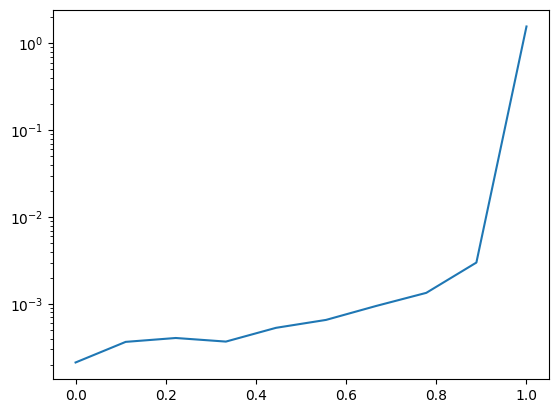

In [19]:
plt.plot(rho, mi)
plt.yscale('log')

In [8]:
from gpt2_compute_reducibility import get_pcas

In [9]:
import argparse

In [ ]:
# parser.add_argument("--layer", type=int, help="Layer of GPT-2", default=7)
# parser.add_argument("--clusters_file", type=str, help="File containing clusters", default="gpt-2_layer_7_clusters_spectral_n1000.pkl")
# parser.add_argument("--cluster", type=int, help="Cluster index to create plot of", default=138) # 138 is days, 251 is months
# parser.add_argument("--activations_file", type=str, help="File containing SAE activations (occurence_data)",
#             default="sae_activations_big_layer-7.npz")
# parser.add_argument("--size_limit", type=int, help="Size limit for the cluster", default=1000)
# parser.add_argument("--sample_limit", type=int, help="Max number of reconstructions in plot", default=20_000)
# parser.add_argument("--threshold", type=float, help="Threshold for activations", default=0.0)
# parser.add_argument("--radius", type=float, help="Exclude points in plane below this radius", default=0.0)
# parser.add_argument("--save_dir", type=str, help="Directory to save figures", default="metrics")

In [10]:
# create args Namespace
args = argparse.Namespace()
args.layer = 7
args.clusters_file = "gpt-2_layer_7_clusters_spectral_n1000.pkl"
args.cluster = 251
args.activations_file = "sae_activations_big_layer-7.npz"
args.size_limit = 1000
args.sample_limit = 20_000
args.threshold = 5.0
args.radius = 0.0

In [11]:
reconstructions_pca = get_pcas(args)

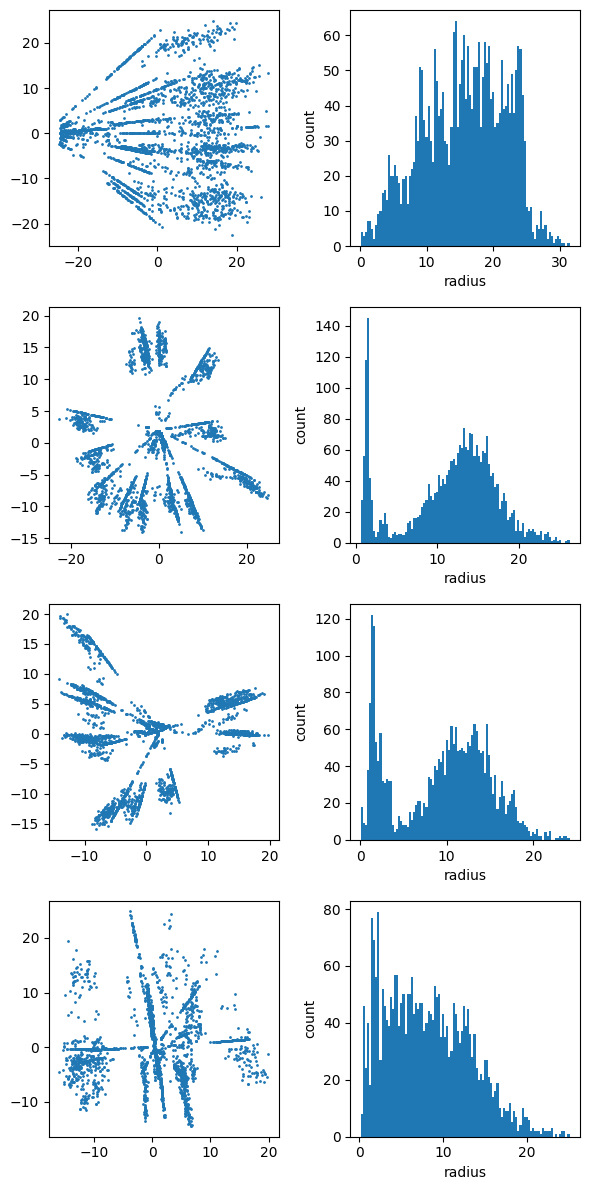

In [12]:
plt.figure(figsize=(6, 12))

for pcai in range(reconstructions_pca.shape[1]-1):
    plt.subplot(reconstructions_pca.shape[1]-1, 2, 2*pcai+1)
    plt.scatter(reconstructions_pca[:, pcai], reconstructions_pca[:, pcai+1], s=1)

    plt.subplot(reconstructions_pca.shape[1]-1, 2, 2*pcai+2)
    radii = np.linalg.norm(reconstructions_pca[:, pcai:pcai+2], axis=1)
    _ = plt.hist(radii, bins=100)
    plt.xlabel("radius")
    plt.ylabel("count")

plt.tight_layout()

In [1]:
# create args Namespace
args = argparse.Namespace()
args.layer = 7
args.clusters_file = "gpt-2_layer_7_clusters_spectral_n1000.pkl"
args.cluster = 20
args.activations_file = "sae_activations_big_layer-7.npz"
args.size_limit = 1000
args.sample_limit = 20_000
args.threshold = 5.0
args.radius = 0.0

NameError: name 'argparse' is not defined

In [ ]:
reconstructions_pca = get_pcas(args)

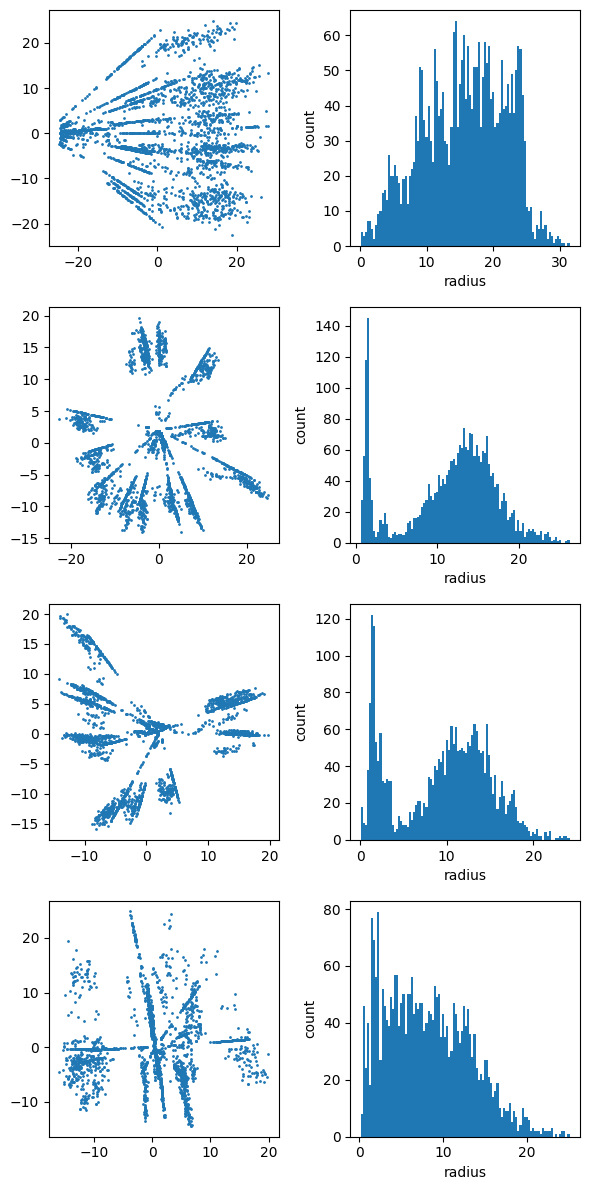

In [ ]:
plt.figure(figsize=(6, 12))

for pcai in range(reconstructions_pca.shape[1]-1):
    plt.subplot(reconstructions_pca.shape[1]-1, 2, 2*pcai+1)
    plt.scatter(reconstructions_pca[:, pcai], reconstructions_pca[:, pcai+1], s=1)

    plt.subplot(reconstructions_pca.shape[1]-1, 2, 2*pcai+2)
    radii = np.linalg.norm(reconstructions_pca[:, pcai:pcai+2], axis=1)
    _ = plt.hist(radii, bins=100)
    plt.xlabel("radius")
    plt.ylabel("count")

plt.tight_layout()

In [13]:
radii = np.linalg.norm(reconstructions_pca, axis=1)

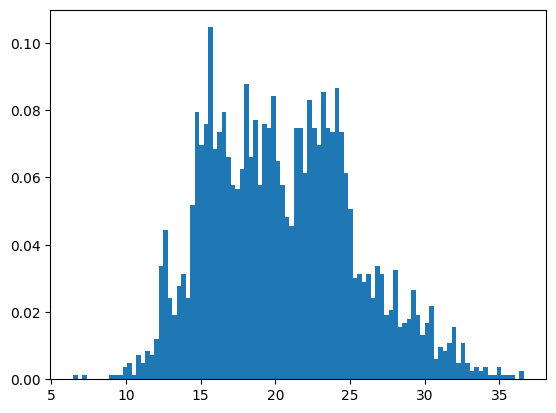

In [14]:
# plot distribution over radii
_ = plt.hist(radii, bins=100, density=True)

In [15]:
import diptest

Text(0, 0.5, 'count')

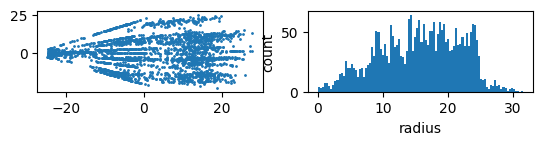

In [16]:
pcai = 0
plt.subplot(reconstructions_pca.shape[1]-1, 2, 2*pcai+1)
plt.scatter(reconstructions_pca[:, pcai], reconstructions_pca[:, pcai+1], s=1)

plt.subplot(reconstructions_pca.shape[1]-1, 2, 2*pcai+2)
radii = np.linalg.norm(reconstructions_pca[:, pcai:pcai+2], axis=1)
_ = plt.hist(radii, bins=100)
plt.xlabel("radius")
plt.ylabel("count")
